In [1]:
from numba import jit, njit, config, __version__, errors
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
@jit(nopython=True)
def vizinhos(N):
  #Define a tabela de vizinhos
  L=int(np.sqrt(N))
  viz = np.zeros((N,4),dtype=np.int16)
  for k in range(N):
    viz[k,0]=k+1
    if (k+1) % L == 0: viz[k,0] = k+1-L
    viz[k,1] = k+L
    if k > (N-L-1): viz[k,1] = k+L-N
    viz[k,2] = k-1
    if (k % L == 0): viz[k,2] = k+L-1
    viz[k,3] = k-L
    if k < L: viz[k,3] = k+N-L
  return viz

In [3]:
@jit(nopython=True)
def calcular_energia(s,viz):
  #Calcula a energia da configuração representada no array s
  N=len(s)
  ener = 0
  for i in range(N):
    h = s[viz[i,0]]+s[viz[i,1]] # soma do valor dos spins a direita e acima
    ener -= s[i]*h
  return ener

In [4]:
@jit(nopython=True)
def calcular_magnetizacao(s):
  return sum(s)

In [5]:
@jit(nopython=True)
def expos(beta):
  ex = np.zeros(5,dtype=np.float32)
  ex[0]=np.exp(8.0*beta)
  ex[1]=np.exp(4.0*beta)
  ex[2]=1.0
  ex[3]=np.exp(-4.0*beta)
  ex[4]=np.exp(-8.0*beta)
  return ex

In [6]:
def alg_metropolis(L, temp_inicial, n_passos = 1000):
  tam_rede = (L ** 2)  # Entre 24 ** 2 e 100 ** 2
  beta = 1/temp_inicial
  ex = expos(beta)
  s = [random.choice([-1, 1]) for _ in range(tam_rede)]
  viz = vizinhos(tam_rede)
  energias = np.zeros(n_passos)
  energia_atual = calcular_energia(s, viz)
  magnetizacoes = np.zeros(n_passos)
  magnetizacao_atual = calcular_magnetizacao(s)
  magnetizacao_atual = 0
  for iter in range(n_passos * tam_rede):
    i = random.randint(0, tam_rede-1)
    h = s[viz[i,0]]+s[viz[i,1]]+s[viz[i,2]]+s[viz[i,3]] # soma dos vizinhos
    de = int(s[i]*h*0.5+2)
    P = ex[de]
    r = random.uniform(0, 1)
    if (r <= P):
      energia_atual += 2 * s[i] * h
      magnetizacao_atual = magnetizacao_atual + (-1) * 2 * s[i]
      s[i] = -s[i]
    else:
      pass
    if (iter % tam_rede == 0):
      energias[int(iter/tam_rede)] = energia_atual
      magnetizacoes[int(iter/tam_rede)] = magnetizacao_atual
  return energias, magnetizacoes

In [7]:
def fazer_alg_metropolis_n_vezes(n, L, temp_inicial, n_passos = 1000):
  arr_energias = np.zeros((n,n_passos))
  arr_magnetizacoes = np.zeros((n,n_passos))
  for i in range(n):
    arr_energias[i], arr_magnetizacoes[i] = alg_metropolis(L, temp_inicial, n_passos)
  return arr_energias, arr_magnetizacoes

In [8]:
def plotar_grafo_linha(arr_dados, label_x, label_y, title = ""):
  x = range(len(arr_dados[0]))
  for y in arr_dados:
    plt.plot(x, y)

  # Add labels and a title
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.title(title)

  # Display the plot
  plt.show()


1) Gere uma configuração inicial para o sistema (aleatória, por exemplo).\
2) Escolha um dos spins da rede (𝑆").\
3) Determine a diferença de energia caso o spin 𝑆" fosse flipado, Δ𝐸.\
4) Calcule 𝑃 = 𝑒^(-beta * del_E), e compare com um número aleatório, 𝑟, uniformemente
distribuído no intervalo (0,1).\
    a. Se 𝑟 ≤ 𝑃, aceite a nova configuração, ou seja, flipe o spin fazendo 𝑆" =
−𝑆".\
    b. Se 𝑟 > 𝑃, mantenha o sistema na configuração em que ele se
encontrava.\
5) Volte ao passo 2.\


In [9]:
L = 32
N = L**2
temp_inicial = 1.5
beta = 1 / temp_inicial
n_passos = 1000
n = 5
arr_energias, arr_magnetizacoes = fazer_alg_metropolis_n_vezes(n, L, temp_inicial, n_passos)

/home/gabriel/miniconda3/envs/fisica/lib/python3.11/site-packages/numba/core/ir_utils.py:2174: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 's' of function 'calcular_energia'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../../../tmp/ipykernel_21642/1467534069.py", line 1:
<source missing, REPL/exec in use?>

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/tmp/ipykernel_21642/1007488008.py:3: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'iterable' of function 'ol_sum.<locals>.impl'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "../../miniconda3/envs/fisica/lib/python3.11/site-pa

In [10]:
print(arr_energias.shape)
print(len(arr_energias[0]))

(5, 1000)
1000


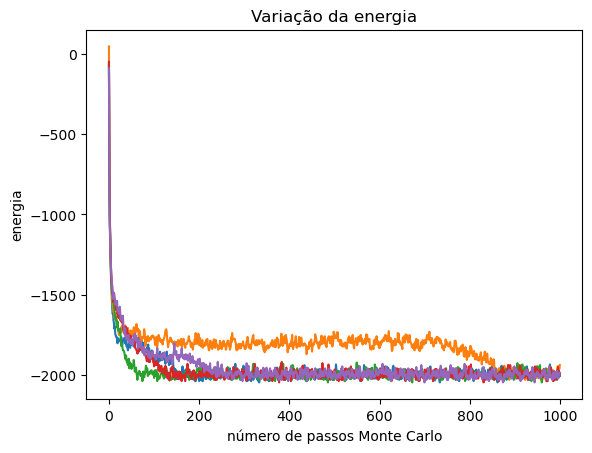

In [11]:
plotar_grafo_linha(arr_energias, "número de passos Monte Carlo", "energia", "Variação da energia")

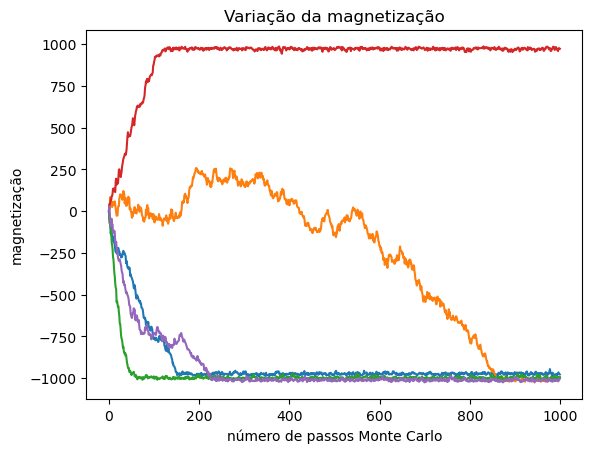

In [12]:
plotar_grafo_linha(arr_magnetizacoes, "número de passos Monte Carlo", "magnetização", "Variação da magnetização")

In [13]:
L = 32
temp_inicial = 0.4
limit=3.0
step=0.2
n_passos = 1000
n = 5
for temp in range(int(temp_inicial*100),int(limit*100+1),int(step*100)):
    temp=temp/100
    if (temp==temp_inicial):
        arr_energias, arr_magnetizacoes = fazer_alg_metropolis_n_vezes(n, L, temp, n_passos)
    else:
        arr_energias_aux, arr_magnetizacoes_aux = fazer_alg_metropolis_n_vezes(n, L, temp, n_passos)
        arr_energias=np.concatenate((arr_energias,arr_energias_aux),0)
        arr_magnetizacoes=np.concatenate((arr_magnetizacoes,arr_magnetizacoes_aux),0)

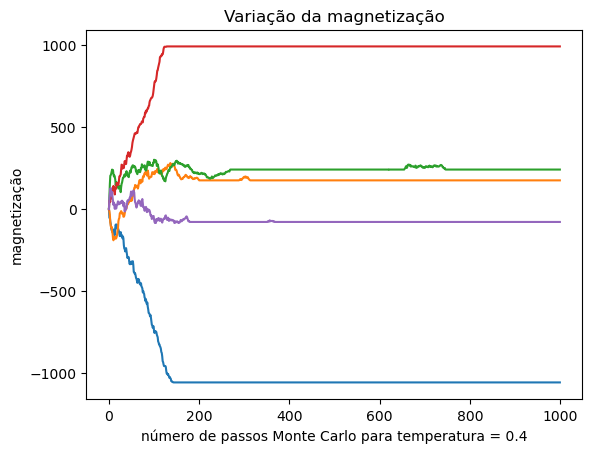

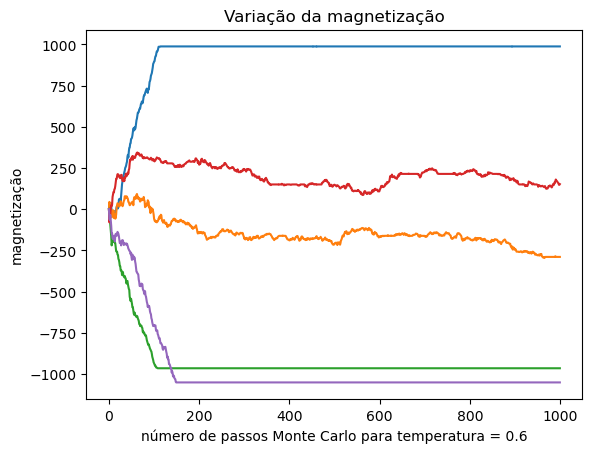

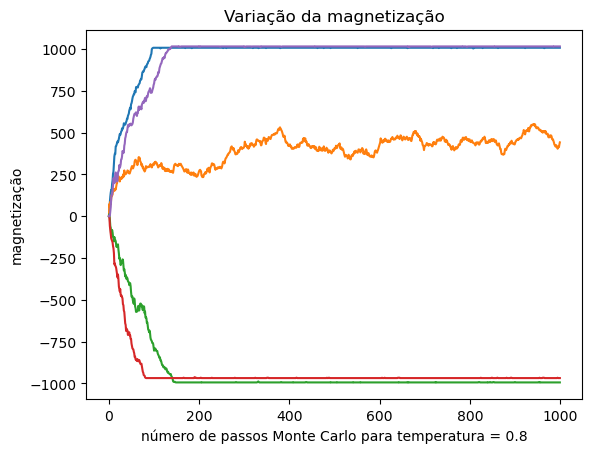

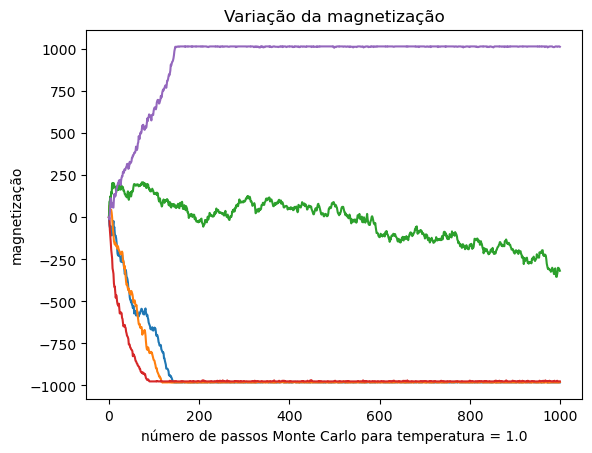

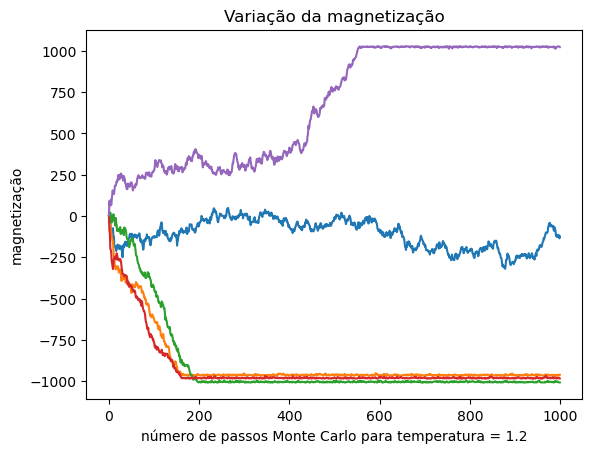

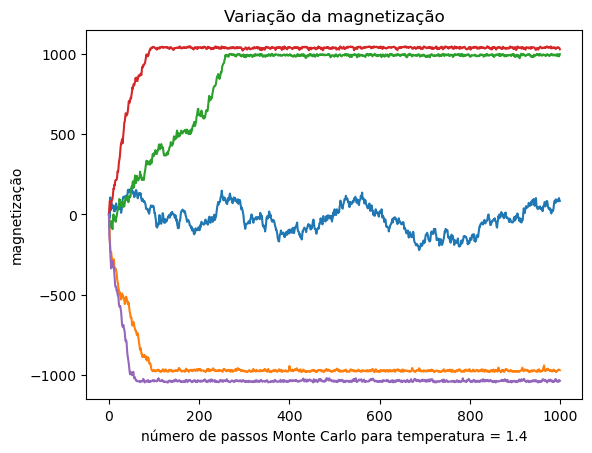

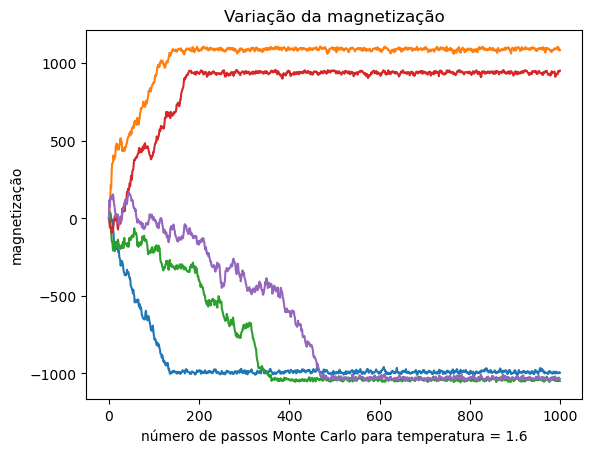

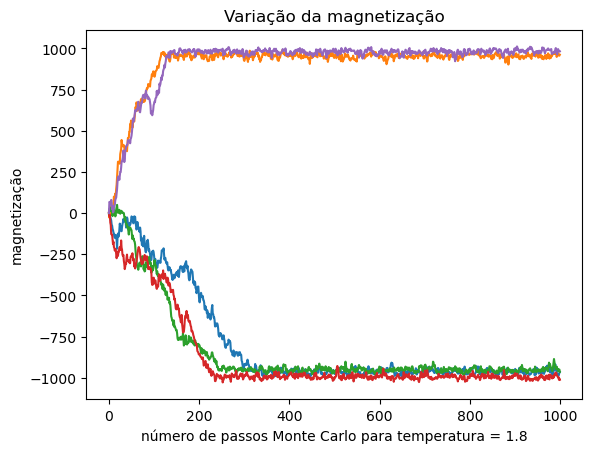

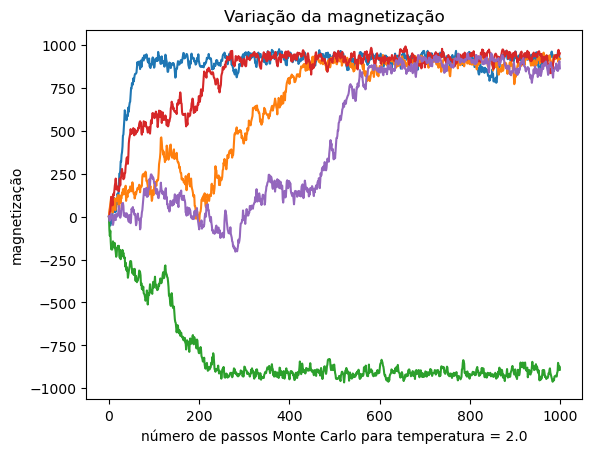

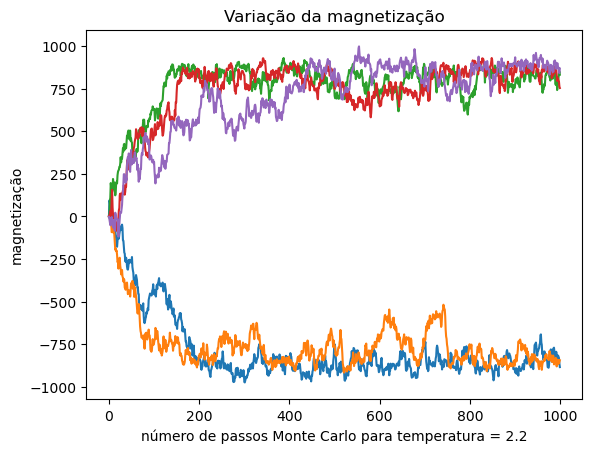

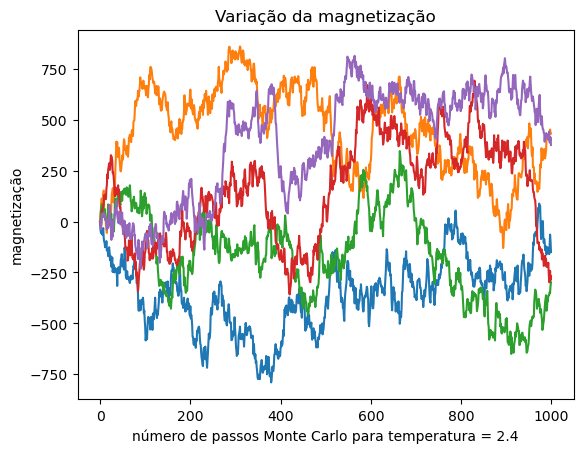

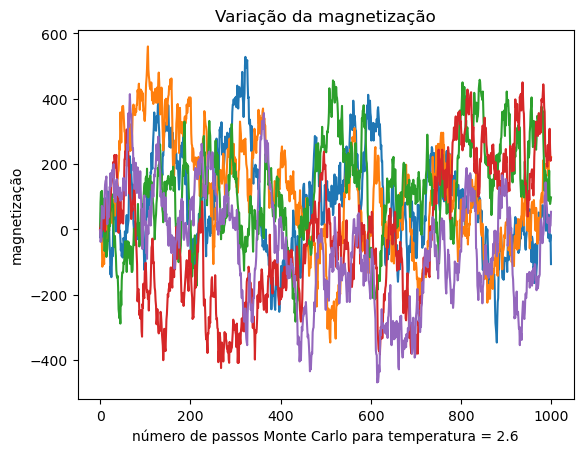

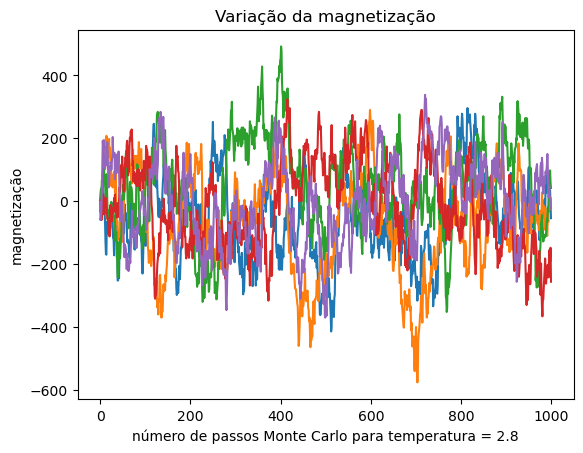

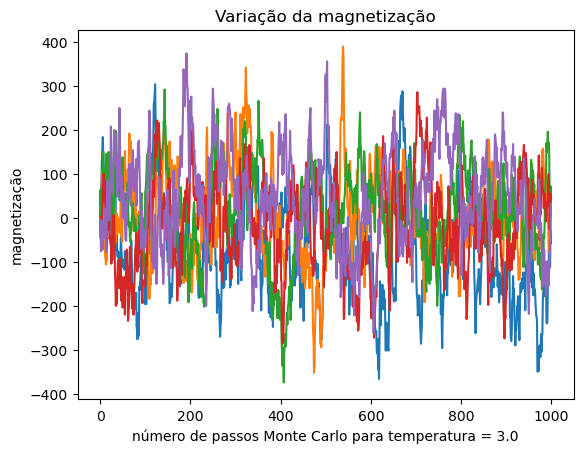

In [14]:
temp=temp_inicial
for i in range(0,arr_energias.shape[0],n):
    plotar_grafo_linha(arr_magnetizacoes[i:i+n], "número de passos Monte Carlo para temperatura = " + str(round(temp,2)), "magnetização", "Variação da magnetização")
    temp=temp+step    

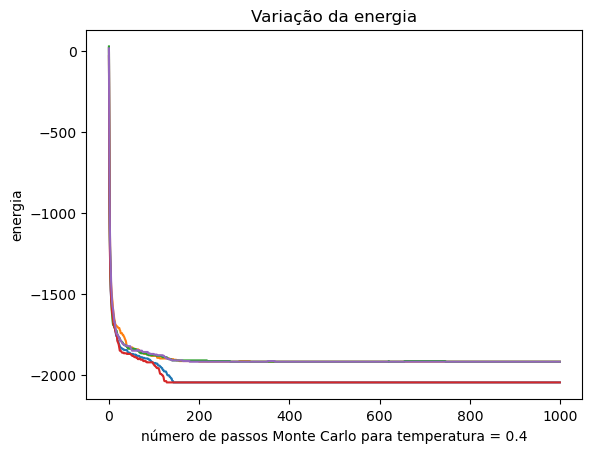

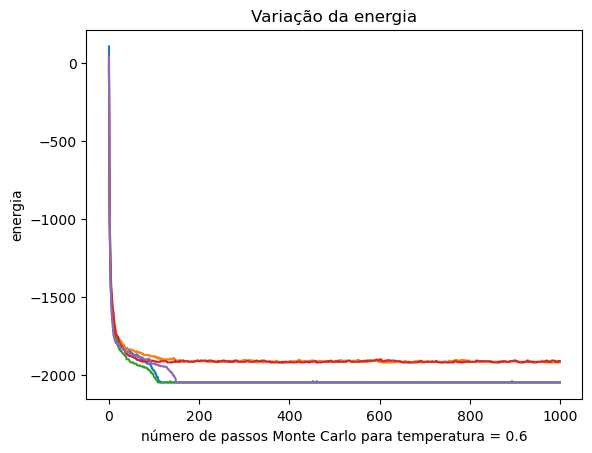

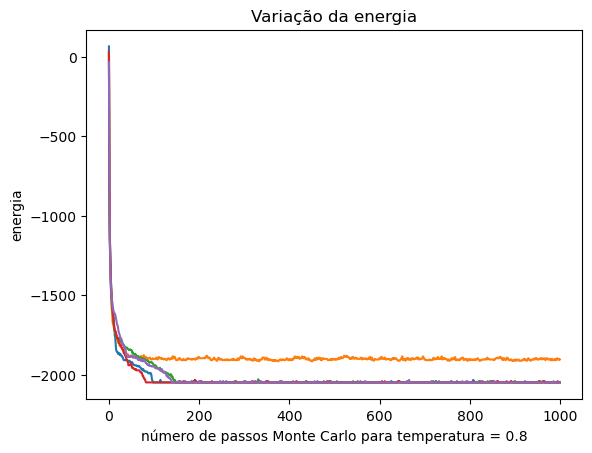

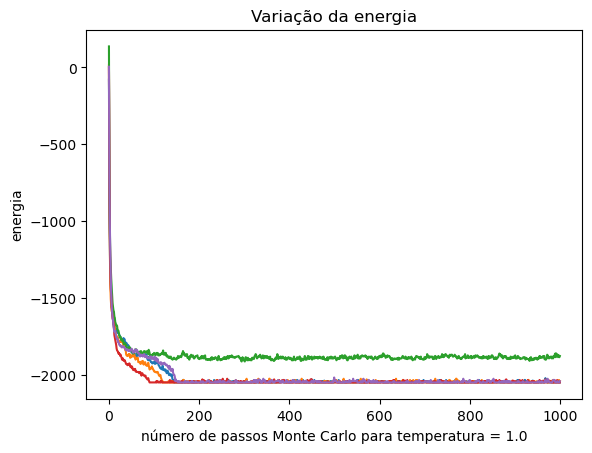

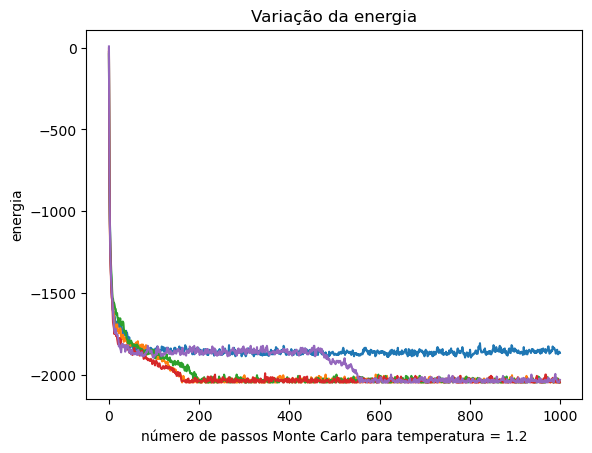

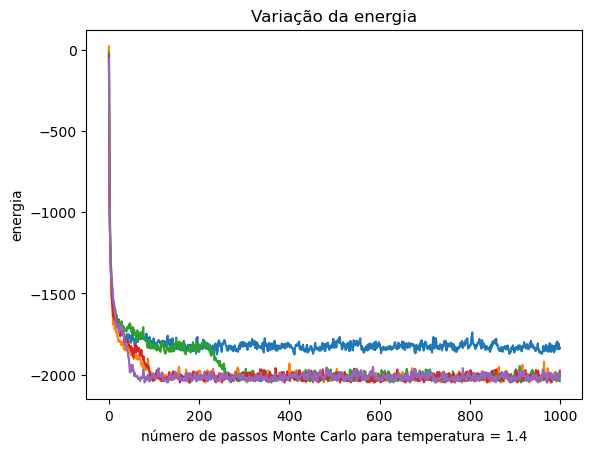

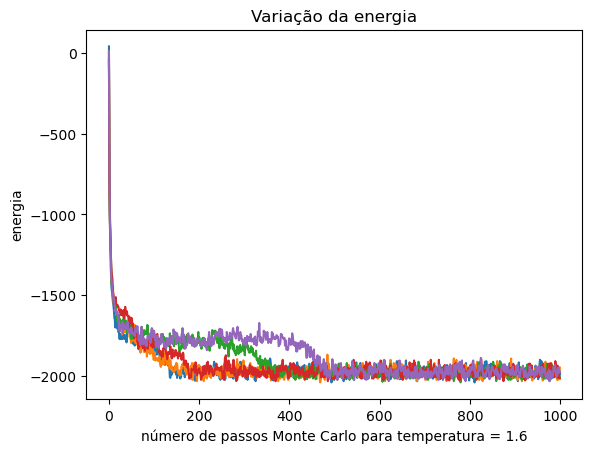

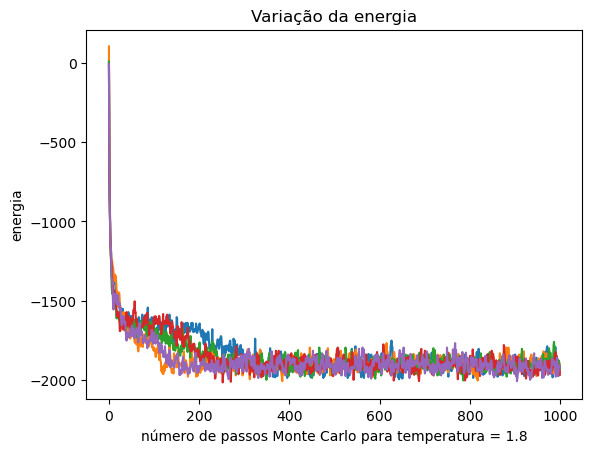

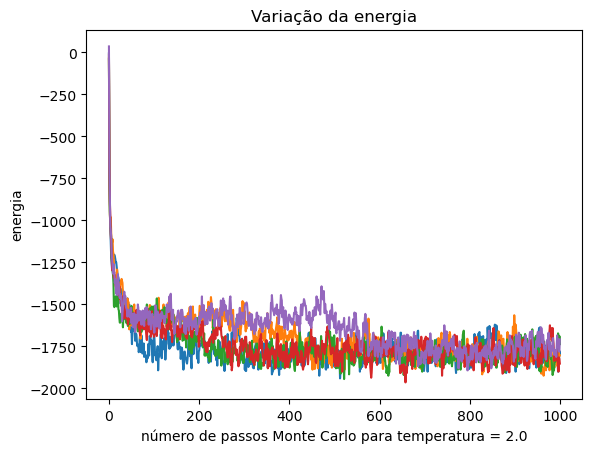

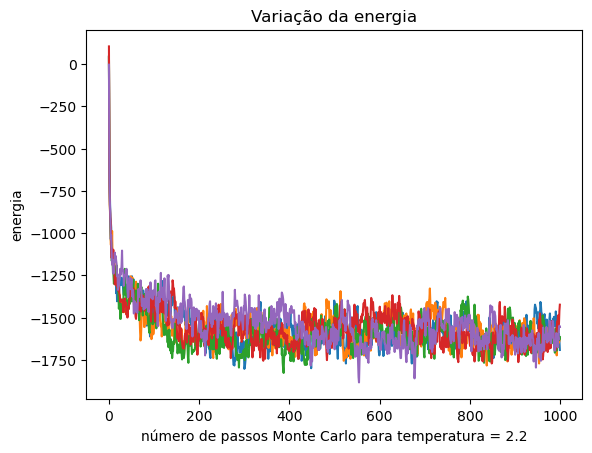

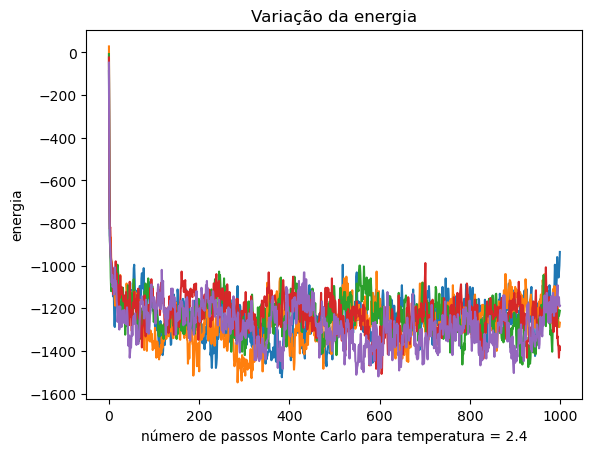

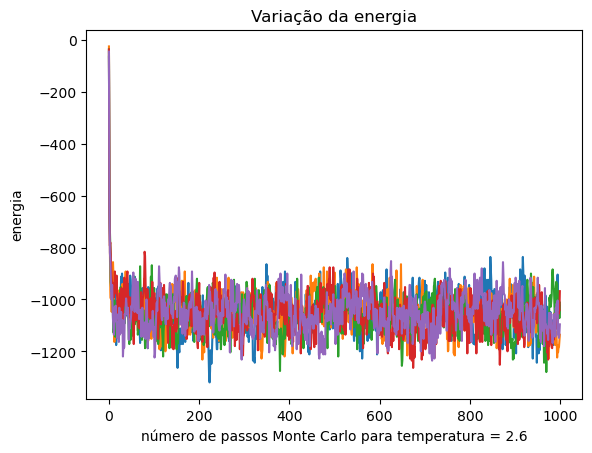

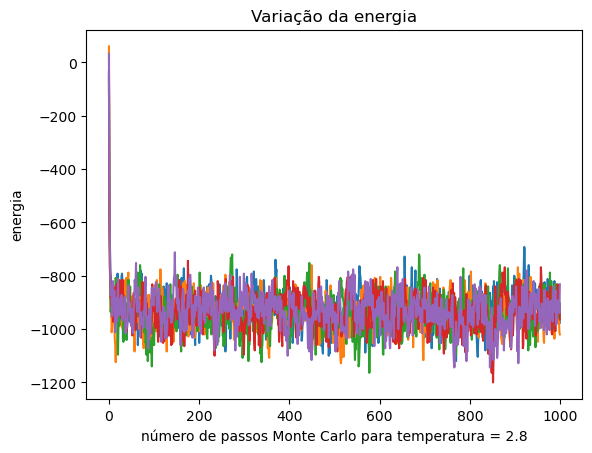

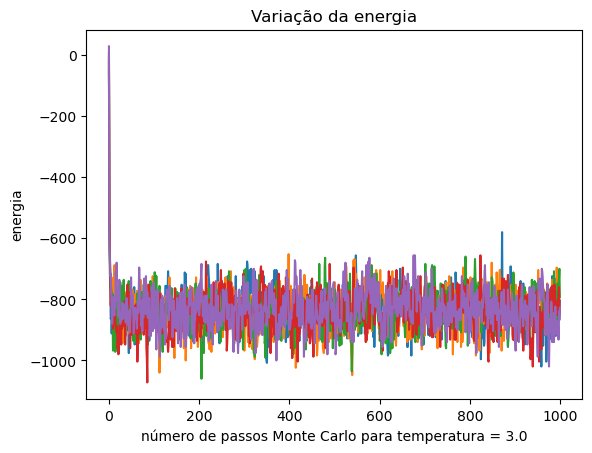

In [15]:
temp=temp_inicial
for i in range(0,arr_energias.shape[0],n):
    plotar_grafo_linha(arr_energias[i:i+n], "número de passos Monte Carlo para temperatura = " + str(round(temp,2)), "energia", "Variação da energia")
    temp=temp+step

## TABELA DE TESTES

    Tamanho da rede(L): 24 < L < 100
     
       32, 64, 96

    Temperatura(T): 0.4 < T < 3.0
    
        0.4, 1.7, 3.0

Escolhemos os valores 32, 64 e 96 de tamanho para rede para podermos testar redes de tamanho pequeno, médio e grande dentro da especificação do trabalho;

Para a temperatura seguimos a mesma lógica, utilizando 0.4 e 3.0 que são valores em ambos os extremos, e 1.7 que é um valor central do intervalo;


Para cada uma das possíveis combinações de L e de T expostas acima utilizamos o algoritmo de metropolis 5 vezes com 1000 passos de teste, com cada uma dessas iterações utilizando uma rede diferente gerada aleatoriamente com o tamanho L definido. Abaixo estão os gráficos de magnetização e energia para cada um dessas combinações.



Graficos para L =  32  e temperatura =  0.4


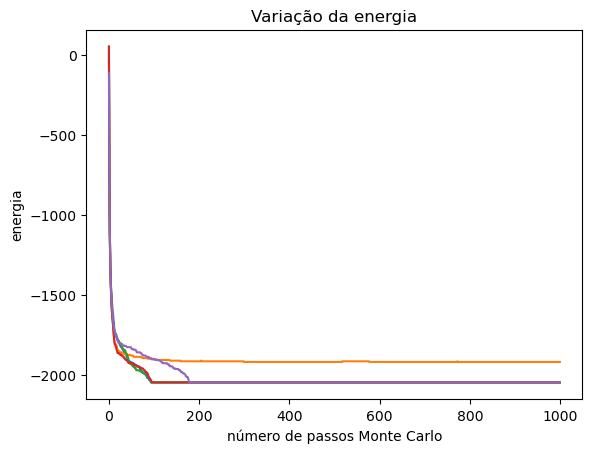

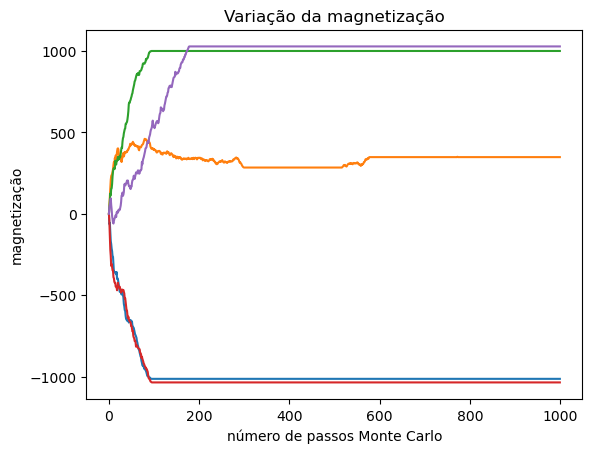

Graficos para L =  64  e temperatura =  0.4


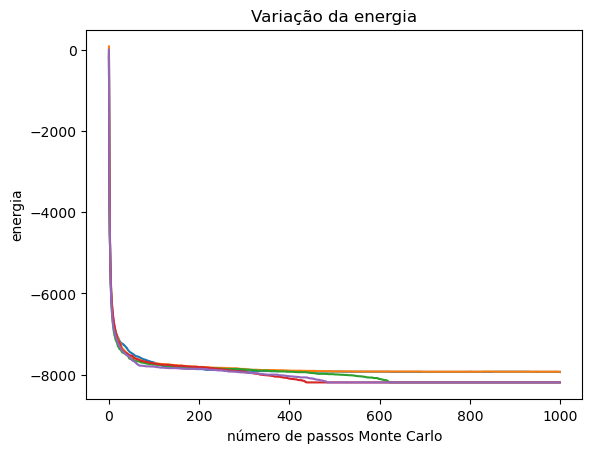

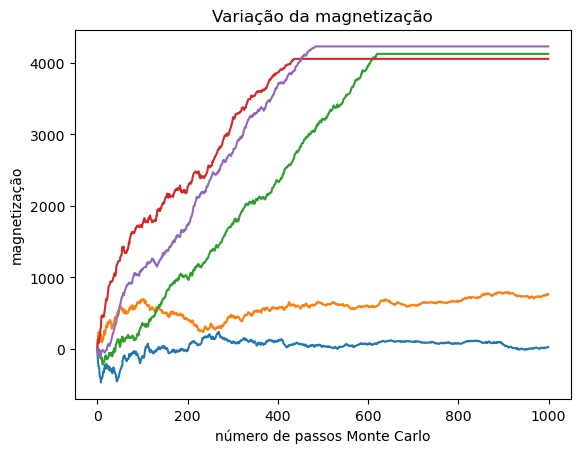

Graficos para L =  96  e temperatura =  0.4


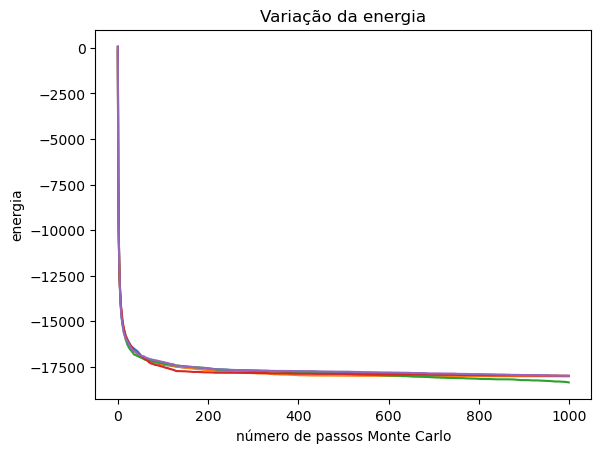

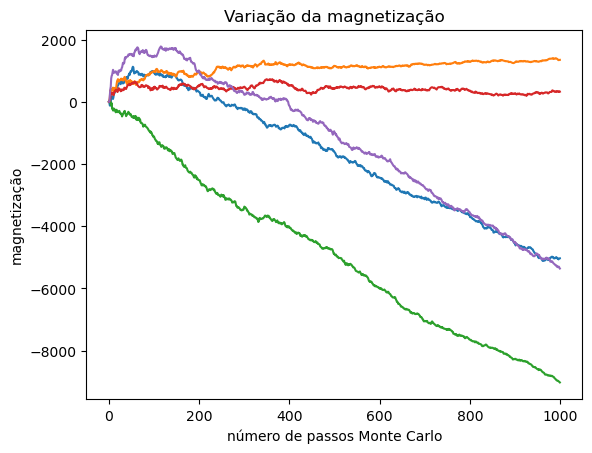

Graficos para L =  32  e temperatura =  1.7


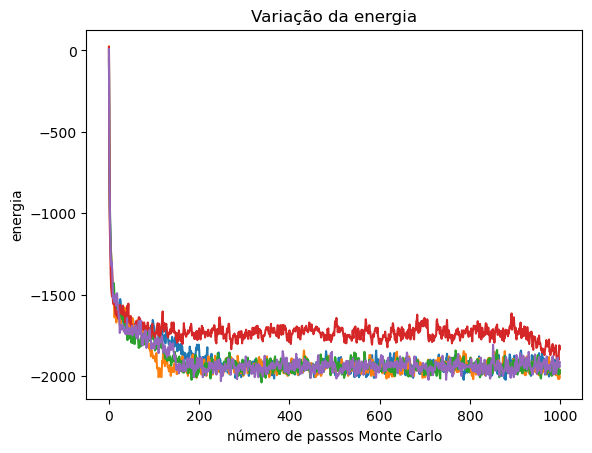

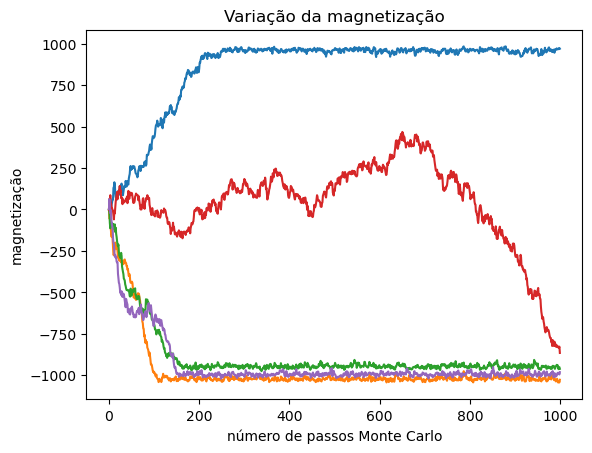

Graficos para L =  64  e temperatura =  1.7


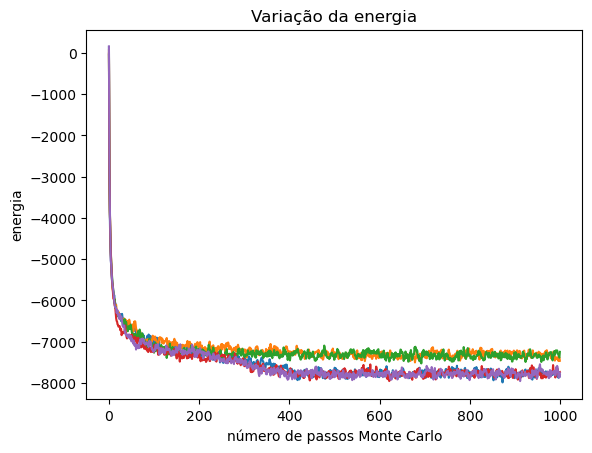

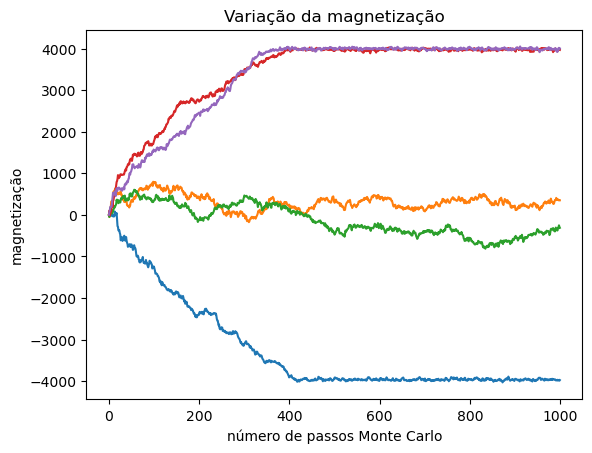

Graficos para L =  96  e temperatura =  1.7


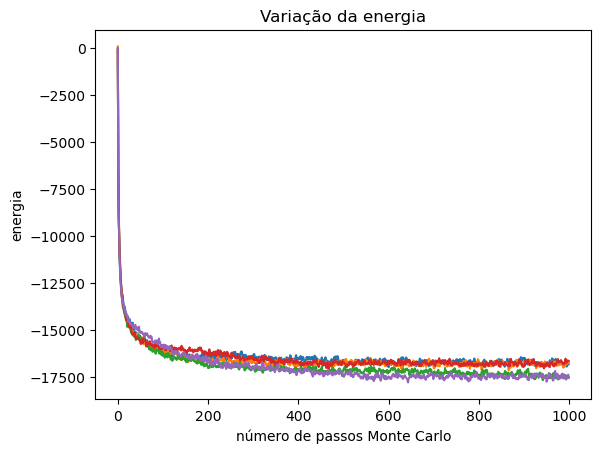

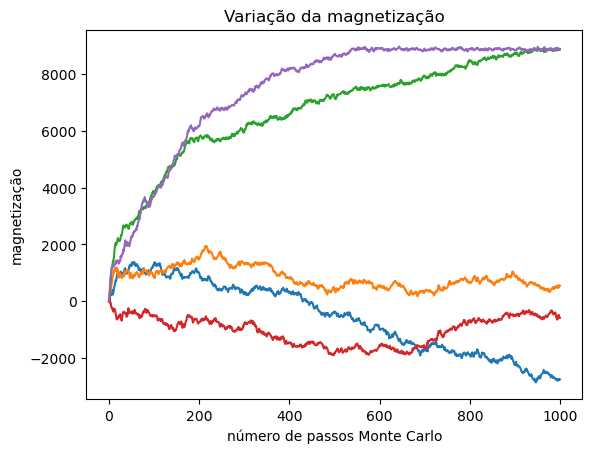

Graficos para L =  32  e temperatura =  3.0


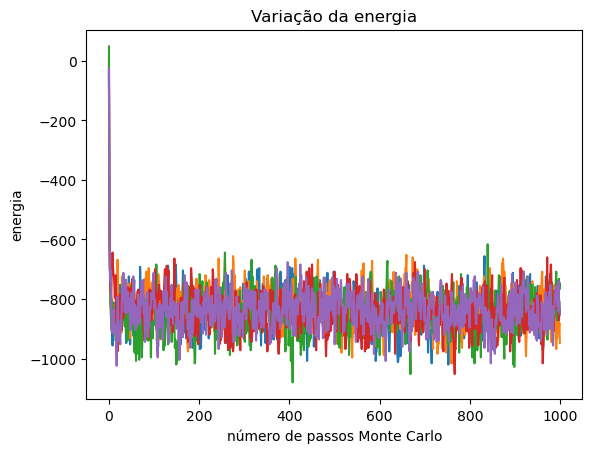

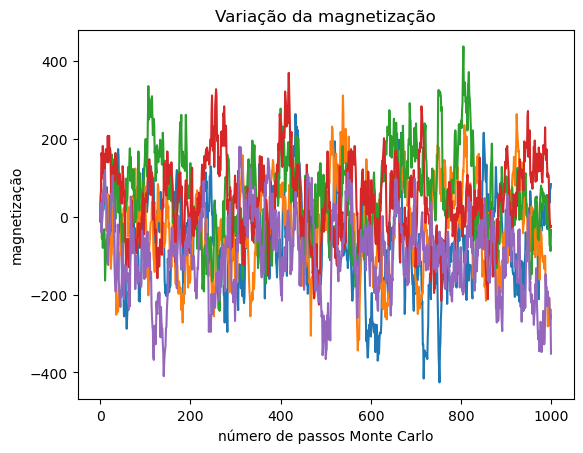

Graficos para L =  64  e temperatura =  3.0


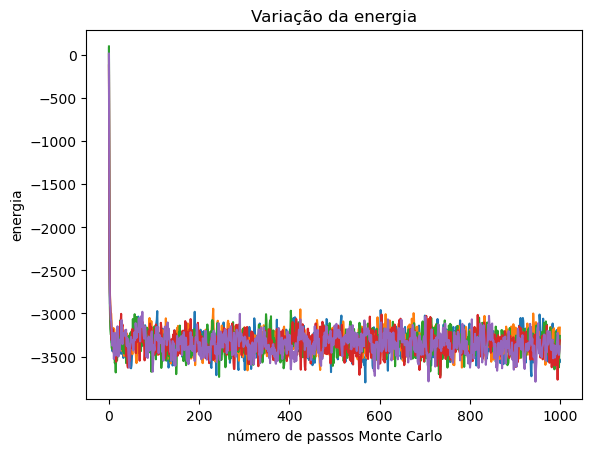

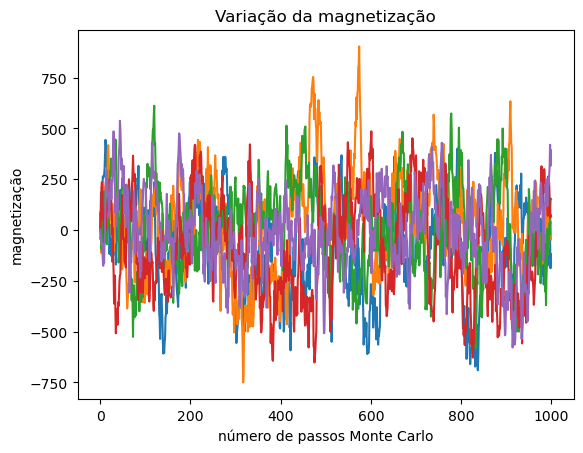

Graficos para L =  96  e temperatura =  3.0


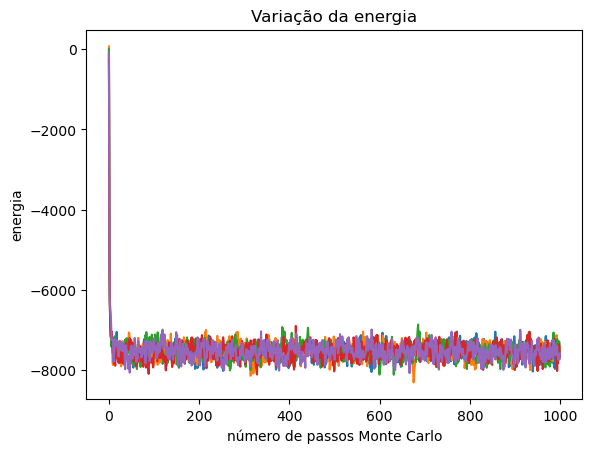

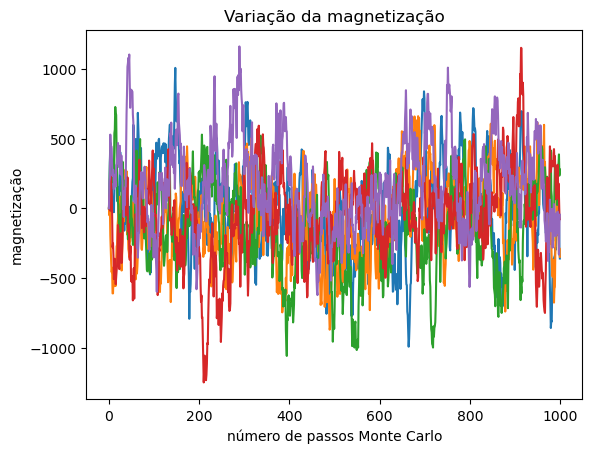

In [16]:
n_passos_teste = 1000
n_teste = 5
for temp in [0.4,1.7,3.0]:
    for L in [32, 64, 96]:
        N_teste = L**2
        beta_teste = 1 / temp
        arr_energias_teste, arr_magnetizacoes_teste = fazer_alg_metropolis_n_vezes(n_teste, L, temp, n_passos_teste)
        print("Graficos para L = ", L, " e temperatura = ", temp)
        plotar_grafo_linha(arr_energias_teste, "número de passos Monte Carlo", "energia", "Variação da energia")
        plotar_grafo_linha(arr_magnetizacoes_teste, "número de passos Monte Carlo", "magnetização", "Variação da magnetização")

Com esses gráficos é possível analizar quando ocorre a termalização para cada uma das nossas combinações


In [17]:
#COM BASE NA ENERGIA
dados = {
    'L = 32': [150, 400, "100*"],
    'L = 64': [400, 600, "100*"],
    'L = 96': [400, 400, "100*"]
}

# Lista de rótulos para as linhas
rotulos_linhas = ['T = 0.4', 'T = 1.7', 'T = 3.0']

# Criar um DataFrame com rótulos para as linhas
tabela = pd.DataFrame(dados, index=rotulos_linhas)

# Exibir a tabela
print("tabela baseada nos gráficos de energia")
tabela

tabela baseada nos gráficos de energia


,L = 32,L = 64,L = 96
T = 0.4,150,400,400
T = 1.7,400,600,400
T = 3.0,100*,100*,100*


Os valores com asterisco indicam incerteza, uma vez que a variação é muito grande a cada instante;

Percebe-se o aumento do número de passos necessários para termalizar com o aumento da temperatura, com exceção de T=3 em que não há certeza sobre o momento da termalização;

Além disso, percebe-se relação entre o aumento de L e a dificuldade de convergir, mas essa relação é mais fraca do que a relação com a magnetização;

Com o aumento da temperatura há um aumento da amplitude das mudanças de estado, e consequentemente variações na energia e magnetização, mesmo após a termalização, dificultando a análise da convergência;

Por isso, a termalização em condições de alta temperatura é vista como baixa, uma vez que a variação que ela apresenta cedo se mantém nos estados seguintes;

In [18]:
#COM BASE NA Magnetização
dados_mag = {
    'L = 32': [200,"500*" ,"Não determinável" ],
    'L = 64': [450,700 , "Não determinável"],
    'L = 96': [500,"Não convergiu" , "Não determinável"]
}

# Lista de rótulos para as linhas
rotulos_linhas = ['T = 0.4', 'T = 1.7', 'T = 3.0']

# Criar um DataFrame com rótulos para as linhas
tabela_mag = pd.DataFrame(dados_mag, index=rotulos_linhas)

# Exibir a tabela
print("tabela baseada nos gráficos de magnetização")
tabela_mag

tabela baseada nos gráficos de magnetização


,L = 32,L = 64,L = 96
T = 0.4,200,450,500
T = 1.7,500*,700,Não convergiu
T = 3.0,Não determinável,Não determinável,Não determinável


Percebe-se um grande efeito da temperatura na magnetização, não permitindo a análise em temperaturas mais altas devido a variação muito alta sem aparente convergência;

Além disso, percebe-se que o aumento na rede proporciona maior dificuldade em termalizar ao analisarmos a magnetização, algo que não foi necessariamente observado na energia;

O asterisco em um dos valores simboliza que a maioria dos testes convergiu mas um deles ainda não havia chegado a conversão no número de passos analisados.

# PDF 2

In [19]:
# Cálculo do Calor Específico
def calc_specific_heat(arr, beta, N):
  """
  Calculates the specific_heat of a system given its energy.
  ------------
  Parameters:
    - arr (np.ndarray): array of energies of the system.
    - beta (float): constant beta.
    - N (int): number of particles in the system.
  Returns:
    - specific_heat (float): specific heat of the system.
  """
  mean_energy = np.mean(arr_energias, axis=1)
  mean_energy_squared = np.mean(arr_energias**2, axis=1)
  specific_heat = (mean_energy_squared - mean_energy**2)*(beta**2)/N
  return specific_heat

In [20]:
specific_heat = calc_specific_heat(arr_energias, beta, N)

In [21]:
temp=temp_inicial
for i in range(0,arr_energias.shape[0],n):
  print("Calor específico para iterações com temperatura = " + str(round(temp,1)))
  for j in range(n):
    print(calc_specific_heat(arr_energias[i+j], beta, N))
  temp=temp+step 

Calor específico para iterações com temperatura = 0.4
[4.97612944 3.69688489 3.1824316  4.55032966 3.602081   5.22694499
 3.37772142 4.62288819 3.42293466 5.08984722 4.42180272 2.99840638
 5.2295276  4.77471577 5.35296105 5.30333416 4.8548766  3.73476544
 4.36082622 5.60794567 3.19282942 5.98112586 6.73117744 5.089434
 6.73202211 3.18199553 4.95078878 7.58420567 5.14764475 5.0475736
 5.65007055 6.07351927 8.05405555 7.28799983 8.51024288 9.14268772
 7.24554149 6.84563772 8.13336244 6.46386916 6.95082664 8.91097027
 6.84936749 6.9631636  7.91547886 6.89926775 6.32327956 6.8475736
 6.85578333 8.25077664 4.55478577 5.35942899 3.89658916 3.97126042
 4.68194919 2.91831989 2.51679775 2.48883975 2.64701975 2.66507222
 2.15756319 2.09476667 2.52074608 2.20221272 2.32063031 1.86538711
 1.94947966 1.831716   1.92036475 1.81375864]
[4.97612944 3.69688489 3.1824316  4.55032966 3.602081   5.22694499
 3.37772142 4.62288819 3.42293466 5.08984722 4.42180272 2.99840638
 5.2295276  4.77471577 5.35296105

In [22]:
# Cálculo do Erro Estatístico
from math import sqrt

def calc_stat_err(arr):
  """
  Calculates the statistical error of a measure.
  ------------
  Parameters:
    - arr (np.ndarray): array of measures from which the error will be calculated.
  Returns:
    - err (integer): the statistical error of the measure.
  """
  avg = arr.mean()
  sum = ((avg - arr)**2).sum()
  err = sqrt(sum / (len(arr) - 1))
  return err


In [23]:
calc_stat_err(specific_heat)

2.014547714347266

In [24]:
# Cálculo da Susceptibilidade Magnética
def calc_magnet_susc(arr, beta, N):
  """
  Calculates the magnetic susceptibility of a system given its magnetization.
  ------------
  Parameters:
    - arr (np.ndarray): array of magnetizations of the system.
    - beta (float): constant beta.
    - N (int): number of particles in the system.
  Returns:
    - magnet_susc(float): magnetic susceptibility of the system.
  """
  mean_energy = np.mean(arr_energias, axis=1)
  mean_energy_squared = np.mean(arr_energias**2, axis=1)
  magnet_susc = (mean_energy_squared - mean_energy**2)*beta/N
  return magnet_susc

In [25]:
calc_magnet_susc(arr_magnetizacoes, beta, N)

array([ 7.46419416,  5.54532733,  4.77364741,  6.82549449,  5.4031215 ,
        7.84041749,  5.06658213,  6.93433229,  5.13440199,  7.63477083,
        6.63270407,  4.49760957,  7.84429141,  7.16207366,  8.02944157,
        7.95500124,  7.28231491,  5.60214817,  6.54123933,  8.4119185 ,
        4.78924413,  8.97168879, 10.09676616,  7.634151  , 10.09803317,
        4.77299329,  7.42618317, 11.3763085 ,  7.72146712,  7.57136041,
        8.47510582,  9.11027891, 12.08108332, 10.93199974, 12.76536432,
       13.71403157, 10.86831224, 10.26845657, 12.20004366,  9.69580374,
       10.42623996, 13.36645541, 10.27405124, 10.44474541, 11.87321829,
       10.34890162,  9.48491933, 10.27136041, 10.28367499, 12.37616496,
        6.83217866,  8.03914349,  5.84488374,  5.95689062,  7.02292379,
        4.37747983,  3.77519663,  3.73325962,  3.97052962,  3.99760833,
        3.23634479,  3.14215   ,  3.78111913,  3.30331907,  3.48094546,
        2.79808067,  2.92421949,  2.747574  ,  2.88054712,  2.72

In [28]:
def vary_temp(L, temp_inicial, limit, step, n_passos, n):
  beta = 1/temp_inicial
  N = L**2

  for temp in range(int(temp_inicial*100),int(limit*100+1),int(step*100)):
    temp = temp/100
    if (temp==temp_inicial):
        arr_energias, arr_magnetizacoes = fazer_alg_metropolis_n_vezes(n, L, temp, n_passos)
    else:
        arr_energias_aux, arr_magnetizacoes_aux = fazer_alg_metropolis_n_vezes(n, L, temp, n_passos)
        arr_energias= np.concatenate((arr_energias,arr_energias_aux),0)
        arr_magnetizacoes=np.concatenate((arr_magnetizacoes,arr_magnetizacoes_aux),0)
  return arr_energias, arr_magnetizacoes



In [31]:
def plot_vary_temp(temp_inicial, arr_energias, arr_magnetizacoes, tipo):
  temp=temp_inicial
  match tipo:
    case 0: # Calor específico
      for i in range(0,arr_energias.shape[0],n):
        plotar_grafo_linha(calc_specific_heat(arr_energias[i:i+n], beta, N), "número de passos Monte Carlo para temperatura = " + str(round(temp,2)), "Calor Específico", "Variação do Calor Específico")
        temp= temp + step
    case 1: # Susceptibilidade magnética
      for i in range(0,arr_energias.shape[0],n):
        plotar_grafo_linha(calc_magnet_susc(arr_magnetizacoes[i:i+n], beta, N), "número de passos Monte Carlo para temperatura = " + str(round(temp,2)), "Susceptibilidade Magnética",
                           "Variação da Susceptibilidade Magnética")
        temp= temp + step
    case 2: # Energia por spin
      for i in range(0,arr_energias.shape[0],n):
        plotar_grafo_linha(arr_energias[i:i+n]/N, "número de passos Monte Carlo para temperatura = " + str(round(temp,2)), "Energia por Spin",
                           "Variação da Energia por Spin")
        temp= temp + step
    case 3: # Magnetização por spin
      for i in range(0,arr_energias.shape[0],n):
        plotar_grafo_linha(arr_magnetizacoes[i:i+n]/N, "número de passos Monte Carlo para temperatura = " + str(round(temp,2)), "Magnetização por Spin",
                           "Variação da Magnetização por Spin")
        temp= temp + step

In [32]:
# Exemplo de chamada da função para computação dos gráficos Calor Específico x Temperatura
L = 32
temp_inicial = 0.4
limit=3.0
step=0.2
n_passos = 1000
n = 5
tipo = 0
arr_energias, arr_magnetizacoes = vary_temp(L, temp_inicial, limit, step, n_passos, n)
plot_vary_temp(temp_inicial, arr_energias, arr_magnetizacoes, tipo)

TypeError: object of type 'numpy.float64' has no len()